In [249]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
plt.rcParams["figure.figsize"] = [14, 8]

In [250]:
df = pd.read_csv(r"C:\Users\macie\Downloads\archive\202004-divvy-tripdata.csv")

In [251]:
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [305]:
gs = df.groupby("start_station_name").agg("ride_id").count().sort_values(ascending=False)
gs = gs.to_frame()
gs = gs.reset_index()
gs = gs.rename(columns={'ride_id': 'number of rentals'})
gs.head(10)



,start_station_name,number of rentals
0,Clark St & Elm St,848
1,Dearborn St & Erie St,730
2,Desplaines St & Kinzie St,720
3,St. Clair St & Erie St,684
4,Clark St & Armitage Ave,625
5,Wabash Ave & Grand Ave,612
6,Broadway & Barry Ave,605
7,Stockton Dr & Wrightwood Ave,584
8,Larrabee St & Webster Ave,575
9,Clark St & Schiller St,570


In [308]:
t1 = df.groupby(["start_station_name","end_station_name"]).agg("ride_id").count().sort_values(ascending=False).head(10)
t1 = t1.to_frame()
t1 = t1.reset_index()
t1 = t1.rename(columns={'ride_id': 'number of rides'})
t1.head(10)

,start_station_name,end_station_name,number of rides
0,Stockton Dr & Wrightwood Ave,Stockton Dr & Wrightwood Ave,119
1,Indiana Ave & Roosevelt Rd,Indiana Ave & Roosevelt Rd,113
2,Clark St & Elm St,Clark St & Elm St,111
3,Larrabee St & Webster Ave,Larrabee St & Webster Ave,110
4,Clarendon Ave & Gordon Ter,Clarendon Ave & Gordon Ter,101
5,Dearborn St & Erie St,Dearborn St & Erie St,101
6,Wabash Ave & Grand Ave,Wabash Ave & Grand Ave,101
7,Wells St & Elm St,Wells St & Elm St,93
8,California Ave & Montrose Ave,California Ave & Montrose Ave,90
9,Federal St & Polk St,Federal St & Polk St,86


In [312]:
zmiana_stacji = df.loc[df.start_station_id != df.end_station_id]
zs = zmiana_stacji.groupby(["start_station_name","end_station_name"]).agg("ride_id").count().sort_values(ascending=False).head(10)
zs = zs.to_frame()
zs = zs.reset_index()
zs = zs.rename(columns={'ride_id': 'number of rides'})
zs.head(10)

,start_station_name,end_station_name,number of rides
0,MLK Jr Dr & 29th St,State St & 33rd St,64
1,State St & 33rd St,MLK Jr Dr & 29th St,46
2,St. Clair St & Erie St,Clinton St & Washington Blvd,44
3,Clinton St & Washington Blvd,St. Clair St & Erie St,43
4,Streeter Dr & Grand Ave,Fairbanks St & Superior St,42
5,Columbus Dr & Randolph St,Dearborn St & Monroe St,38
6,Kingsbury St & Erie St,Dearborn St & Erie St,38
7,Aberdeen St & Jackson Blvd,Loomis St & Lexington St,38
8,Larrabee St & Oak St,Clark St & Elm St,37
9,Halsted St & Willow St,Pine Grove Ave & Waveland Ave,36


In [255]:
zmiana_stacji.groupby(["start_station_name"]).agg("ride_id").count().sort_values(ascending=False).head(10)

start_station_name
Clark St & Elm St            739
Desplaines St & Kinzie St    655
Dearborn St & Erie St        629
St. Clair St & Erie St       620
Clark St & Armitage Ave      552
Broadway & Barry Ave         530
Wabash Ave & Grand Ave       513
Clark St & Lincoln Ave       497
Clark St & Schiller St       491
Columbus Dr & Randolph St    481
Name: ride_id, dtype: int64

In [256]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df['time_spent'] = df['ended_at'] - df['started_at']

df = df.loc[df["time_spent"] < '1 days']
df = df.loc[df["time_spent"] > '0 days']
timebiking = df['ended_at'] - df['started_at']

timebiking.sort_values(ascending=False)

45232   0 days 23:58:33
20880   0 days 23:56:39
62897   0 days 23:55:10
58084   0 days 23:38:58
68148   0 days 23:34:32
              ...      
11425   0 days 00:00:02
70245   0 days 00:00:02
63395   0 days 00:00:02
36281   0 days 00:00:01
16560   0 days 00:00:01
Length: 84594, dtype: timedelta64[ns]

In [257]:
timebiking.mean()

Timedelta('0 days 00:23:59.091176679')

In [258]:
timebiking = timebiking.loc[timebiking < '1 days']
timebiking = timebiking.loc[timebiking > '0 days']

In [259]:
timebiking.sort_values(ascending=False)

45232   0 days 23:58:33
20880   0 days 23:56:39
62897   0 days 23:55:10
58084   0 days 23:38:58
68148   0 days 23:34:32
              ...      
11425   0 days 00:00:02
70245   0 days 00:00:02
63395   0 days 00:00:02
36281   0 days 00:00:01
16560   0 days 00:00:01
Length: 84594, dtype: timedelta64[ns]

In [260]:
timebiking.mean()

Timedelta('0 days 00:23:59.091176679')

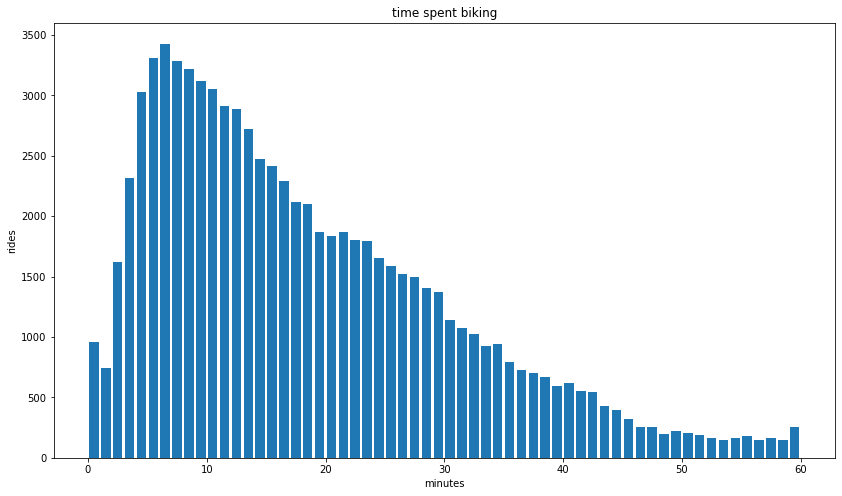

In [261]:
fig = (timebiking.astype('timedelta64[m]')).plot.hist(bins = 60, range = (0,60), rwidth = 0.8)
fig.set_title("time spent biking")
fig.set_xlabel("minutes")
fig.set_ylabel("rides")
fig.set_adjustable('box', share=False)


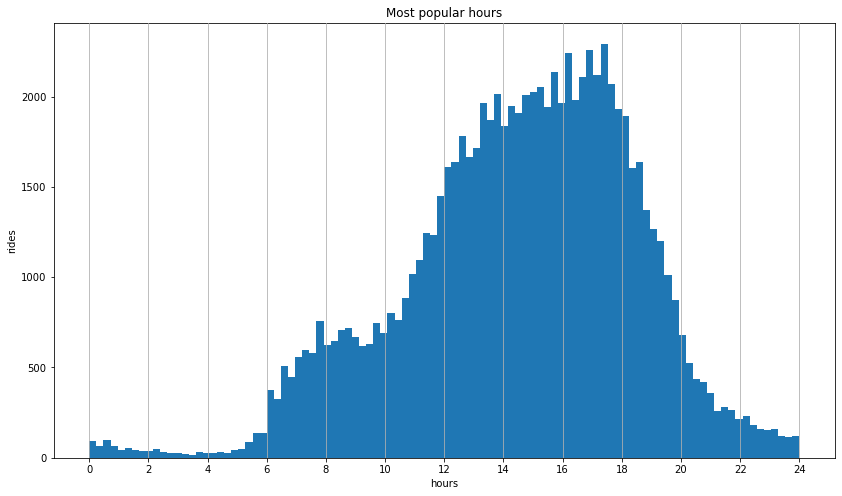

In [262]:
fig = (df['started_at'].dt.hour +df['started_at'].dt.minute/60).plot.hist(bins = 100, range = (0,24))
fig.set_title("Most popular hours")
fig.set_xlabel("hours")
fig.set_ylabel("rides")
fig.set_adjustable('box', share=False)
ticks = np.arange(0,25,2)
fig.set_xticks(ticks)
fig.grid(axis="x")
plt.rcParams['axes.axisbelow'] = False

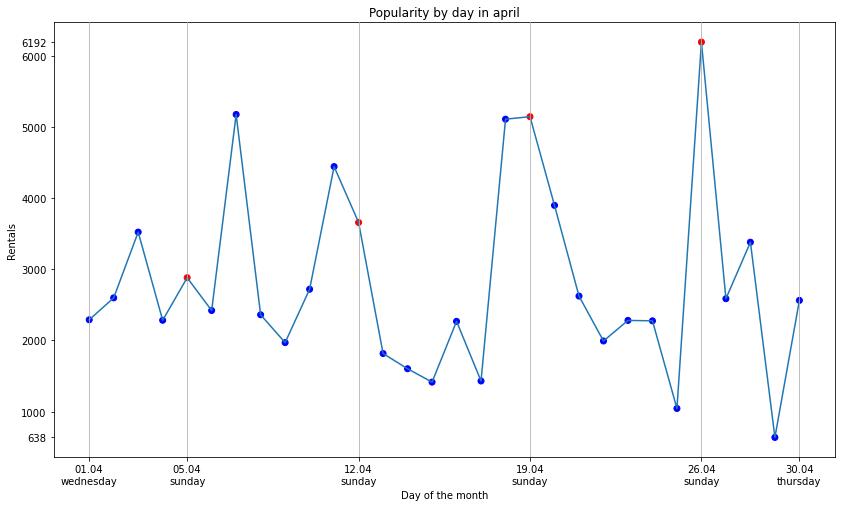

In [263]:
df["date"] = df["started_at"].dt.date
ridesByDay =  df.groupby("date").agg("ride_id").count()
df3 = pd.Series(list(range(len(ridesByDay))))
colors = ['red' if i%7 == 4 else 'blue' for i in df3]

fig, ax = plt.subplots()
ax.scatter(df3+1, ridesByDay, c=colors)
ax.plot(df3+1, ridesByDay)
ax.set_title("Popularity by day in april")
ax.set_xlabel("Day of the month")
ax.set_ylabel("Rentals")

ticks = [1,5,12,19,26,30]
labels = ['01.04\nwednesday','05.04\nsunday','12.04\nsunday','19.04\nsunday',
          '26.04\nsunday','30.04\nthursday']
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.grid(axis="x")
ax.set_yticks([ridesByDay.min(),1000,2000,3000,4000,5000,6000,ridesByDay.max()])
plt.rcParams['axes.axisbelow'] = True



In [264]:
a = df.groupby("start_station_name").agg('time_spent').sum().sort_values(ascending=False)
b = df.groupby("start_station_name").agg('time_spent').count().sort_values(ascending=False)
a = pd.merge(a,b, on="start_station_name")
a["mean"] = a["time_spent_x"] / a["time_spent_y"]
a = a.loc[a["time_spent_y"]>100]
a.sort_values(["mean"], ascending=False)


,time_spent_x,time_spent_y,mean
start_station_name,,,
Chicago Ave & Dempster St,3 days 09:45:17,109,0 days 00:45:00.155963302
Sheridan Rd & Greenleaf Ave,2 days 22:41:45,108,0 days 00:39:16.527777777
State St & Kinzie St,6 days 04:16:45,229,0 days 00:38:51.026200873
Leavitt St & North Ave,4 days 07:27:29,161,0 days 00:38:33.347826086
Benson Ave & Church St,2 days 21:18:01,110,0 days 00:37:48.009090909
...,...,...,...
Clinton St & Jackson Blvd,1 days 03:48:36,119,0 days 00:14:01.310924369
Fairbanks St & Superior St,2 days 07:43:26,241,0 days 00:13:52.390041493
900 W Harrison St,1 days 05:26:18,129,0 days 00:13:41.534883720


In [265]:
df["weekday"] = df["started_at"].dt.dayofweek
df["weekday"] = df["started_at"].dt.dayofweek
weekdf = df.groupby("weekday").agg("ride_id").count()
weekdf

weekday
0    10723
1    12783
2     8698
3    11683
4     9950
5    12881
6    17876
Name: ride_id, dtype: int64

<BarContainer object of 7 artists>

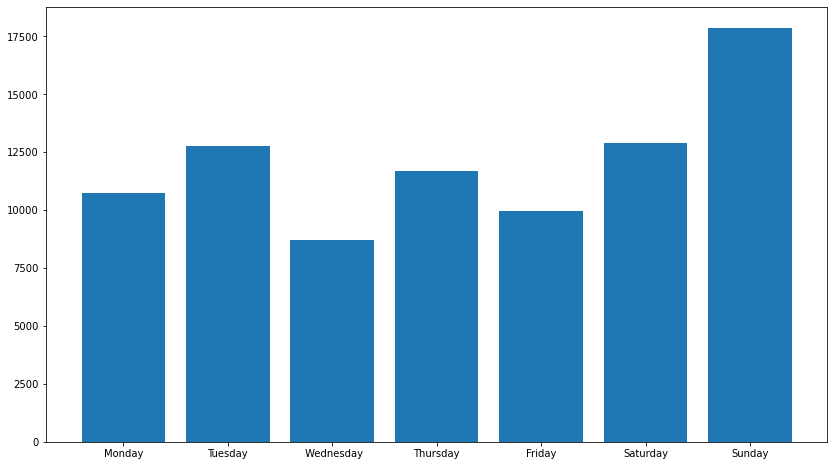

In [266]:
x = ['Monday', 'Tuesday', ' Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ]
plt.figure()
plt.bar(x,weekdf)

In [267]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}


datecount = df.groupby("date").agg("ride_id").count()
dateweek = df.groupby("date").agg("weekday").mean()
dt = pd.concat([datecount, dateweek],axis = 1)
dt["weekday"] = dt["weekday"].map(dayOfWeek)

Text(0, 0.5, 'Rentals')

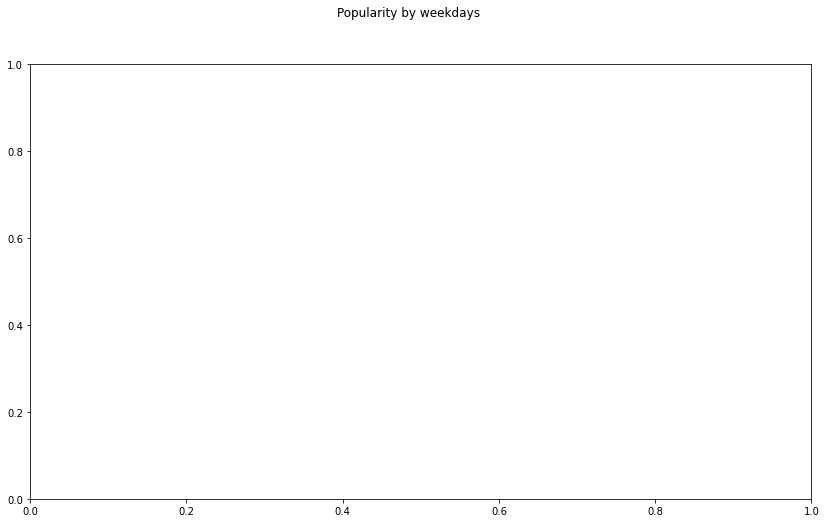

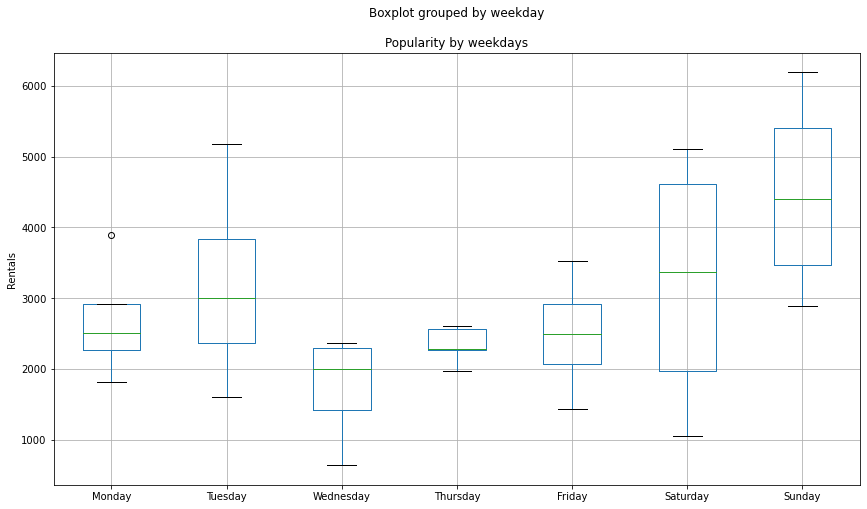

In [268]:
p = [5,1,6,7,4,2,3]
fig, ax = plt.subplots()
ax = dt.boxplot(by = "weekday",positions = p)
fig.suptitle("Popularity by weekdays")
ax.set_title("Popularity by weekdays")
ax.set_xlabel("")
ax.set_ylabel("Rentals")

In [269]:
dt

,ride_id,weekday
date,,
2020-04-01,2291,Wednesday
2020-04-02,2599,Thursday
2020-04-03,3523,Friday
2020-04-04,2284,Saturday
2020-04-05,2882,Sunday
2020-04-06,2421,Monday
2020-04-07,5175,Tuesday
2020-04-08,2361,Wednesday
2020-04-09,1970,Thursday
